# **Rapport PIAE - Analyse acoustique des instruments de musique**
## Tom GERMAIN, Hugo LE CARDINAL, Andrea ZANCHETTA

## **Sommaire**  
1) Introduction

    1.1) Caractéristique du son

2) Méthodes + Résultats + Discussion

    2.1) Caractéristique du son.
    Protocole + type de capteur utilisé. 

    -   2.1.1) Étude de l'enveloppe guitare et piano 

        2.1.2) Étude du spectre de la guitare et piano 

        2.1.3) Comparaison avec modèle numérique 

    2.2) Étude de l'harmonicité d'un accord  

    -   2.2.1) Première approche : à partir des notes séparées  

        2.2.2) A partir d'un accord unique

- Analyse du système étudié :  
  - Identifier les principaux phénomènes physiques mis en jeu lors de la génération d’un 
son. 
  - Identifier des principales des quantités en acoustique. 
- Mise en place d’un modèle : 
  - Mettre  en  place  un  modèle  numérique  (python,  adams,  solidworks,  autres...) 
permettant  de  modéliser  la génération et la perception d’un son,  et  identifier  les 
hypothèses de simplification. 
- Proposer et mettre en place un protocole expérimental : 
  - Identifier les points de comparaison possibles par rapport au modèle mis en place 
  - Identifier les capteurs nécessaires, la chaîne d’acquisition correspondante 
  - Evaluer les incertitudes liées aux mesures expérimentales. 
- Exploiter les acquisitions : 
  - Définir  un  post-traitement rigoureux permettant d’extraire des signaux les données 
pertinentes pour la corrélation modèle/expérimentation. 
  - Exploiter  les  données  pour  recaler  le  ou  les  modèles  numériques  permettant  de 
reproduire le comportement observé en agissant sur les caractéristiques du système.

## Introduction

*petit introduction sympa*

![piano note diagram](assets/diagramme_piano.png)

Un piano présente des touches qui correspond à des notes. Chaque touche est un note qui augmente en fréquence de gauche à droite.
Mais on arrive à distinguer un note C4 joué sur le piano et le même note C4 joué sur la guitare.. Pourquoi ?

Nous pouvons differencier les instruments grâce au timbre. Il s'agit de la qualité sonore qui permet de distinguer deux sons de même hauteur et de même intensité, mais provenant d’instruments différents. Il dépend de plusieurs facteurs tels que le contenu harmonique, l’enveloppe du son (attaque, decay, sustain, release), et les bruits transitoires.

Nous avons méné l'étude du timbre des instruments sur deux phénomènes: l'enveloppe du son et le contenu harmonique/spectre du son et vérifier si les 2 moyens permettre de bien distinguer certains instruments.

### 1.1 Caractéristique du son
Dans un premier temps, pour la suite de notre expérimentation, il va falloir de prendre des mesures du son.

Nous avons donc installé un capteur spécialisé pour l’enregistrement audio à proximité des cordes du piano, dans le but de capter au mieux le son émis par l’instrument tout en minimisant l'influence des bruits ambiants ou parasites provenant de l’environnement extérieur. Ce positionnement permet de prioriser le signal acoustique propre au piano, notamment lors des frappes sur les touches, afin d’obtenir des données précises et exploitables.

Le capteur mesure une grandeur physique liée à la variation du signal, comme une différence de potentiel électrique (par exemple, dans le cas d’un capteur de type Hall). Cette variation est ensuite interprétée comme une amplitude relative du son. Ces mesures temporelles permettent d’analyser l’évolution du signal au cours du temps, ce qui est essentiel pour étudier les caractéristiques acoustiques du piano et pour toute modélisation ou traitement ultérieur du signal.

### 1.1.1 Envelopppe
Généralement, lorsqu'un instrument de musique est joué, le son n'apparaît pas immédiatement après l'action. Inversement, le son disparaît progressivement après qu'un niveau a été maintenu pendant un certain temps. Le processus de changement d'amplitude dans le temps est appelé « enveloppe » ou « enveloppe sonore ». La courbe de l'enveloppe peux être classé en quatre parties : l'attaque ou « attack » en anglais, la décroissance « decay », le maintien « sustain » et le relâchement « release » d'où le terme « ADSR envelope » est couramment utilisé dans le domaine musical. L'attaque représente le processus de montée pour atteindre l'amplitude maximale après la génération du son. Le processus d'intensité maximale jusqu'à l'état de maintien est appelé décroissance. Le maintien est le moment où le son conserve plus ou moins son volume et le processus de disparition du son est appelé relâchement.

L'attaque est le facteur le plus influent sur la clarté parmi les 4 autres parties. Le relâchement est un facteur important dans la perception de la réverbération de l'instrument. L'attaque a également la plus grande influence sur la sonorité de l'instrument. Le violon et la harpe sont des instruments typiques avec un long relâchement dans sa enveloppe tandis que l'attaque rapide est caractérisée par des instruments tels que le piano, la batterie et le xylophone qu'ils sont d'ailleurs des instruments percussifs.

### 1.1.2 Spectre
Lorsqu’un instrument produit un son, celui-ci n’est jamais une onde pure composée d’une seule fréquence. En fait, il est constitué d’une fréquence fondamentale, qui correspond à la hauteur perçue du son, ainsi que de multiples fréquences supplémentaires appelées harmoniques ou partiels. L’ensemble de ces fréquences forme ce qu’on appelle le spectre harmonique du son.

Ce spectre peut être analysé à l’aide de la transformation de Fourier, qui décompose le signal en ses différentes composantes fréquentielles. Le résultat, représenté graphiquement, montre les pics d’intensité pour chaque fréquence présente dans le son. Cette représentation est appelée spectre de Fourier.

Le contenu harmonique est l’un des principaux éléments qui déterminent le timbre d’un instrument. Deux instruments jouant exactement la même note à la même intensité auront des spectres harmoniques différents, ce qui permettra à l’oreille humaine de les distinguer. Par exemple, une flûte et un violon jouant un La (440 Hz) auront la même fréquence fondamentale, mais des harmoniques d’intensités et de distributions différentes, ce qui crée des sensations auditives distinctes.

Les instruments à cordes comme le violon ou la guitare présentent généralement un spectre riche en harmoniques, donnant un son chaud et complexe. En revanche, les instruments à vent comme la clarinette ou le saxophone ont des spectres plus marqués par certains partiels et absents d’autres, ce qui contribue à leur caractère unique.

En somme, la fréquence fondamentale définit la hauteur perçue du son qui est également la fréquence plus bas présent dans le spèctre d'un note joué. Le contenu harmonique joue un rôle crucial dans la perception de la brillance, de la chaleur ou de la dureté d’un son. Un son avec beaucoup d’harmoniques aigus semblera plus brillant, alors qu’un son riche en harmoniques graves paraîtra plus rond ou doux. Le spectre harmonique est donc un outil essentiel pour comprendre la couleur sonore d’un instrument. Dans la suite, nous allons étudier les comportements des harmoniques present dans la guitare, et le piano. Et puis nous allons vérifier nos hypothèse avec la réalité avec un modèle théorique dans la partie suivante.


## 2 Méthodes, Résultats et Discussion
### 2.1 Caractéristique du son
Nous avons limité l'analyse au même registre afin de limiter les nombreux factor de notre mesures. De plus, il faut qu'on joue de façon similaire, c'est-à-dire que l'amplitude max de notre enregistrement doit être similaire (une différence d'environ 5%) qui réflet une note joué de même 'intensité'.
### 2.1.1 Étude de l'enveloppe guitare et piano

<div class="alert alert-block alert-info">
Il s'agit d'une analyse qualitative.
</div>

*Methode*
1. Pour caractériser notre son sous un enveloppe segmenté, nous allons d’abord faire un contour autour de l’amplitude du signal à chaque pas de temps, nous faisons l’absolue afin d’obtenir l’enveloppe du signal.
 
2. Nous identifions 5 points ce qui fait 4 segments. Le premier point marque le début de la génération du son. Le deuxième marque l’amplitude maximale de cette génération de son. Le troisième point signifie le changement de pente dans la chute de l’amplitude de ce son. Et puis, le quatrième identifie le moment où on arrête de générer le son, et le dernier point marque l’extinction complet du son.

Nous avons donc analyser les caracteristique des enveloppes de la guitare et du piano.

In [2]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, windows
import itertools
from fractions import Fraction

In [3]:
def prepare_audio(file_name, start_time, end_time, sr):
    y, sr = librosa.load(file_name, sr=sr, offset=start_time, duration=end_time-start_time)
    #y = y[round(sr*start_time):round(sr*end_time)]
    x = np.arange(start_time*sr, end_time*sr)
    x = x[:len(y)]  # Force equal length
    
    return y, x

def compute_envelope(y, sr, win_len_sec=0.1):
    """Computation of a signal's envelopes
    Args:
        y (np.ndarray): Signal (waveform) to be analyzed
        win_len_sec (float): Length (seconds) of the window (Default value = 0.01)
        sr (scalar): Sampling rate (Default value = 22050)

    Returns:
        env (np.ndarray): Magnitude envelope
    """
    win_len_half = round(win_len_sec * sr * 0.5)
    N = y.shape[0]
    env = np.zeros(N)
    for i in range(N):
        i_start = max(0, i - win_len_half)
        i_end = min(N, i + win_len_half)
        env[i] = np.amax(np.abs(y)[i_start:i_end])
    return env

def norm_adsr(arr):
    arr1 = arr.copy()
    arr1[:,0] = arr1[:,0]-arr1[0,0] # relative to 0
    arr1[:,1] = arr1[:,1]/arr1[1,1] # normal the max value to 1
    return arr1

def norm_env(arr):
    """Normalize envelope data.
    Args:
        x_env_tuple: (x_values, envelope_values)
    Returns:
        (normalized_x, normalized_envelope)
    """
    x, env = np.array(arr).copy()
    
    # Normalize envelope to [0,1] range
    if len(env) > 0:
        env_norm = env / np.max(env)
    else:
        env_norm = env.copy()
        
    return x, env_norm

D'abord, nous devons d'abord découper l'enregistrement audio qui ne contient que la note jouée

In [4]:
# pour la guitare

# sampling rate
sr = 44100

# E2
y_guitar, x_guitar = prepare_audio("Audio/GuitarAplucklength.wav", 11.4, 14.2, sr) 

Ensuite, nous allons tracer la courbe de l'enveloppe. Pour un certain intervalle de temps qui balaye notre signal, nous prenons la valeur absolue maximale. En diminuant l'intervalle de temps, nous améliorerions la précision.

In [5]:
env_guitar = compute_envelope(y_guitar, sr)

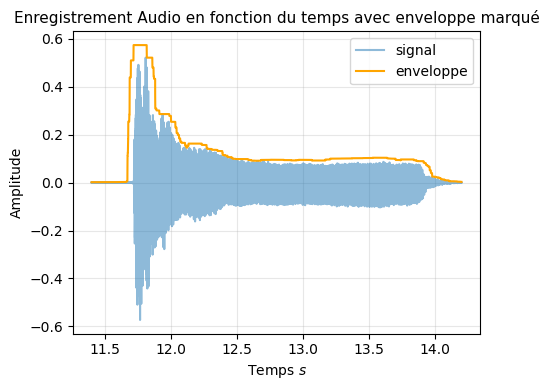

In [6]:
def plot_enveloppe_et_audio(enveloppe, audio):
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    ax.plot(audio[0]/sr, audio[1], alpha=0.5, label="signal")
    ax.plot(audio[0]/sr, enveloppe, 'orange', label="enveloppe")
    ax.set_title("Enregistrement Audio en fonction du temps avec enveloppe marqué",  fontsize=11)
    ax.set_xlabel(r"Temps $s$", fontsize=10)
    ax.set_ylabel("Amplitude", fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()

plot_enveloppe_et_audio(env_guitar, (x_guitar, y_guitar))

Après, nous identifions les 4 parties de l'enveloppe à la main pour chaque enregistrement.

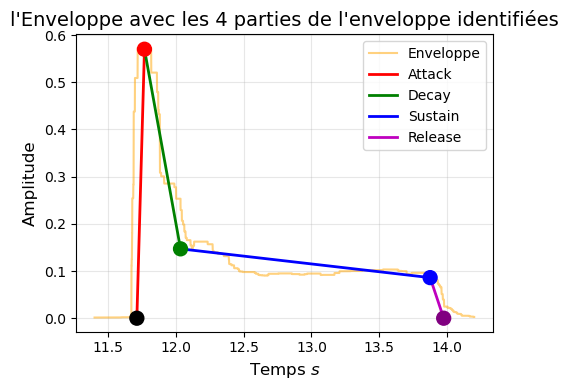

In [7]:
# adsr de la note E2 de la guitare
adsr_guitar = np.array([[11.712, 0], [11.768, 0.57], [12.034, 0.147], [13.875, 0.086], [13.975, 0]])

def plot_adsr(liste_adsr, audio):
    # Create figure
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    # Plot the envelope
    ax.plot(audio[0]/sr, audio[1], 'orange', alpha=0.5, label='Enveloppe')
    # Plot ADSR stages with different colors
    # Attack (from start to peak)
    ax.plot(liste_adsr[0:2,0], liste_adsr[0:2,1], 'r-', linewidth=2, label='Attack')
    # Decay (from peak to sustain level)
    ax.plot(liste_adsr[1:3,0], liste_adsr[1:3,1], 'g-', linewidth=2, label='Decay')
    # Sustain (constant level)
    ax.plot(liste_adsr[2:4,0], liste_adsr[2:4,1], 'b-', linewidth=2, label='Sustain')
    # Release (from sustain to zero)
    ax.plot(liste_adsr[3:5,0], liste_adsr[3:5,1], 'm-', linewidth=2, label='Release')
    # Mark the key points
    ax.scatter(liste_adsr[:,0], liste_adsr[:,1], c=['black', 'red', 'green', 'blue', 'purple'], s=100, zorder=5)
    # Add labels and title
    ax.set_title("l'Enveloppe avec les 4 parties de l'enveloppe identifiées", fontsize=14)
    ax.set_xlabel(r"Temps $s$", fontsize=12)
    ax.set_ylabel("Amplitude", fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_adsr(adsr_guitar, (x_guitar, env_guitar))


In [8]:
# POUR VÉRIFIER LA FIABILITÉ

# E2 (deuxième éssai)
y_guitar2, x_guitar2 = prepare_audio("Audio/GuitarAplucklength.wav", 15, 19.5, sr)

# middle of bridge E2 pour voir les differences des conditions initiales à nous intérroger
y_guitar2_mid, x_guitar2_mid = prepare_audio("Audio/GuitarAplucklength.wav", 30.5, 34.4, sr) 

# juste pour les spectres
# low
y_guitar_low, x_guitar_low = prepare_audio("Audio/Guitar.wav", 11.3, 16, sr) 
# mid
y_guitar_mid, x_guitar_mid = prepare_audio("Audio/Guitar.wav", 17.4, 23, sr)
# high
y_guitar_high, x_guitar_high = prepare_audio("Audio/Guitar.wav", 31, 36, sr) 


adsr_guitar2 = np.array([[15.05, 0], [15.106, 0.566], [15.418, 0.123], [19.352, 0.044], [19.471, 0]])

#norm_adsr(adsr_guitar)
#norm_adsr(adsr_guitar2)

# figure 3 - avec courbe simplifie de l'enveloppe
# fig, ax = plt.subplots(1,1, figsize=(5,4))
# ax.set_title("Enveloppes de la note E2 sur la guitare", fontsize=14)
# ax.set_xlabel(r"Temps $s$", fontsize=12)
# ax.set_ylabel("Amplitude", fontsize=12)
# ax.plot(adsr_guitar2[:,0], adsr_guitar2[:,1], 'r-', label="note E2")
# ax.plot(adsr_guitar[:,0], adsr_guitar[:,1], 'b-', label="note E2 (2ème essai)")

# ax.legend(fontsize=10)
# ax.grid(True, alpha=0.3)
#plt.tight_layout()

En comparant avec le F4 du piano

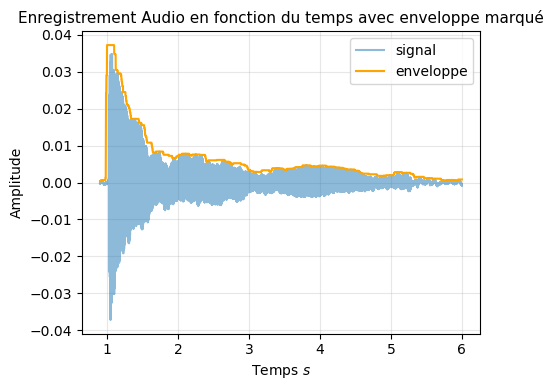

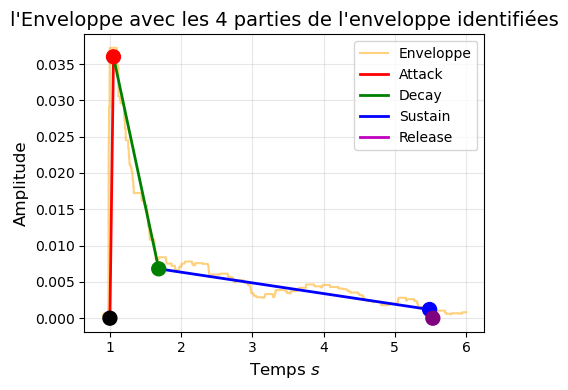

In [9]:
y_piano_f4, x_piano_f4 = prepare_audio("Audio_HD/F4.wav", 0.9, 6, sr=sr)
env_piano_f4 = compute_envelope(y_piano_f4, sr=sr)

plot_enveloppe_et_audio(env_piano_f4, (x_piano_f4, y_piano_f4))

# on note certains points distinctes
adsr_piano_f4 = np.array([[1.00226757e+00, 0.00000000e+00], [1.05215420e+00, 3.60000000e-02], [1.68707483e+00, 6.80000000e-03], [5.48752834e+00, 1.20000000e-03], [5.53287982e+00, 0.00000000e+00]])

plot_adsr(adsr_piano_f4, (x_piano_f4, env_piano_f4))

In [10]:
def plot_difference_adsr(arrs):
    """
    Args:
        arrs (list): [arr1, arr2]
        where each arr = [adsr, (x_values, envelope_values)]
        1 guitar, 2 piano, 3 alto sax
    """
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    labels = ["guitare", "piano", "alto saxophone"]
    colors = ['r', 'b', 'orange']
    for i, arr in enumerate(arrs):
        adsr_norm = norm_adsr(arr[0])
        #x_norm, env_norm = norm_env(arr[1])  # This should return (x, env)
        
        #ax.plot(x_norm/sr, env_norm, 'orange', label="Envelope")
        ax.plot(adsr_norm[:, 0], adsr_norm[:, 1], label=labels[i], color=colors[i])
    
    ax.set_title("Difference des ADSR", fontsize=11)
    ax.set_xlabel(r"Time $s$", fontsize=10)
    ax.set_ylabel("Amplitude", fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

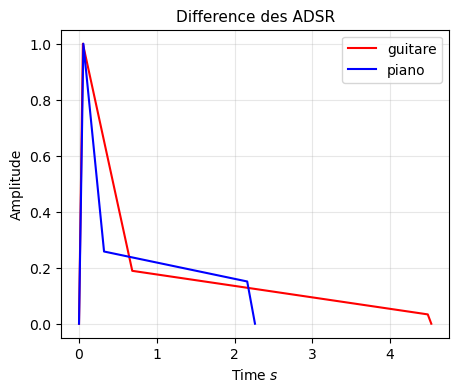

In [11]:
arr_piano = [adsr_piano_f4, (x_piano_f4, env_piano_f4)]
arr_guitare = [adsr_guitar, (x_guitar, env_guitar)]
#arr_guitare2 = [adsr_guitar2, (x_guitar2, env_guitar)]

arrs = [arr_piano, arr_guitare]
plot_difference_adsr(arrs)
    

Resultats : Les enveloppes sonores présentent des caractéristiques assez similaires. Sur la figure générée, la courbe bleue correspond à l’enveloppe du piano, tandis que la courbe orange représente celle de la guitare. On observe que les deux sons atteignent leur amplitude maximale en un temps très proche. La principale différence réside dans la phase de décroissance (decay), qui varie d’un instrument à l’autre.

Discussion : on constate que nous avons pu faire 2 éssai enrègistrement avec un amplitude maximal similaire.

au final, ca se repose sur le dissipation d'energie. le piano a un sound board plus grand qu'une guitare qui fait qu'il peut resonner a des frequence plus bas qui fait ressortir ces frequences.

Au final on trouve pas une distinction forte, car ils sont des insturments a cordes qui fonctionne de maniere tres similaires. 
Alors, en comparant avec une son d'un instrument a vent (le alto saxophone) (lien youtube...), on trouve une enveloppe très differente.
(figure)

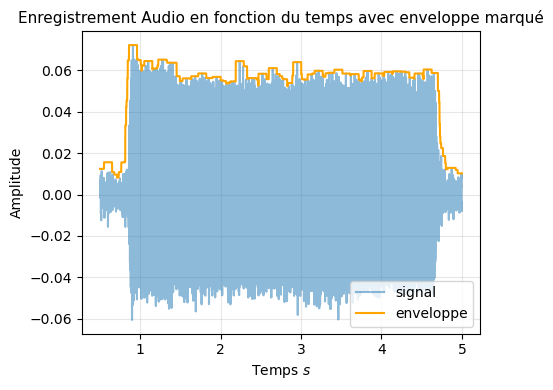

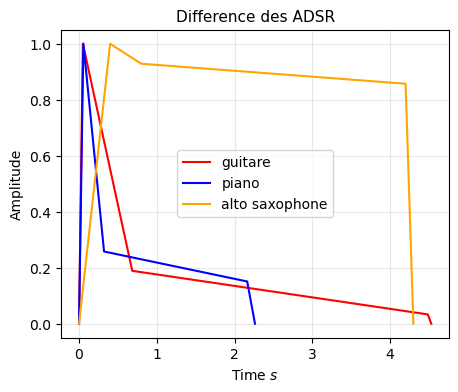

In [12]:
sr = 44100
y_sax_e2, x_sax_e2 = prepare_audio("Audio/sax.wav", 0.5, 5, sr) 

env_sax_e2 = compute_envelope(y_sax_e2, sr)
adsr_sax = np.array([[0.5, 0], [0.9, 0.07], [1.3, 0.065], [4.7, 0.06], [4.8, 0]])

arr_sax = [adsr_sax, (x_sax_e2, env_sax_e2)]
plot_enveloppe_et_audio(env_sax_e2, (x_sax_e2, y_sax_e2))

arrs = [arr_piano, arr_guitare, arr_sax]
plot_difference_adsr(arrs)

Ici, se degagent clairement une enveloppe totalement different, caractérisé par un attack et un decay très petit. est tant que le personne souffle dans l'instrument pour generer le son, le son reste dans un etat de sustain. Ils sont different à cause des phenomenes different ou on donne toujours d'energie de vibration mais lorsqu'il n'ya plus il ne peux plus faire du son. Par contre la corde s'agit d'une force à un instant mais il continue a oscillé parceque l'energie est stoqué dans la corde. 

In [59]:
# # est-ce que la hauteur de la note guitare influe l'enveloppe ?
# # NONs
# def process_adsr_norm(arr, arrt):
#     arrt = arrt[:len(arr)]  # Force equal length
#     arrt = arrt-arrt[0] # relative to 0
    
#     arr = arr/np.max(arr) # normal the max value to 1
#     return arr, arrt

# arr_high = process_adsr_norm(compute_envelope(y_guitar_high, sr), x_guitar_high)
# arr_mid = process_adsr_norm(compute_envelope(y_guitar_mid, sr), x_guitar_mid)
# arr_low = process_adsr_norm(compute_envelope(y_guitar_low, sr), x_guitar_low)

# # Create figure
# fig, ax = plt.subplots(1,1, figsize=(5,4))
# ax.plot(arr_high[1]/sr, arr_high[0], 'orange', label="enveloppe supérieur 1")
# ax.plot(arr_mid[1]/sr, arr_mid[0], 'red', label="enveloppe supérieur 2")
# ax.plot(arr_low[1]/sr, arr_low[0], 'blue', label="enveloppe supérieur 3")
# ax.set_title("Enregistrement Audio en fonction du temps avec enveloppe marqué",  fontsize=11)
# ax.set_xlabel(r"Temps $s$", fontsize=10)
# ax.set_ylabel("Amplitude", fontsize=10)
# ax.legend(fontsize=10)
# ax.grid(True, alpha=0.3)

# #plt.tight_layout()

In [60]:
# adsr_guitar = np.array([[11.712, 0], [11.768, 0.57], [12.034, 0.147], [13.875, 0.086], [13.975, 0]])

# # Create figure
# fig, ax = plt.subplots(1,1, figsize=(5,4))

# # Plot the envelope
# ax.plot(x_guitar/sr, env_guitar, 'orange', alpha=0.5, label='Enveloppe')

# # Plot ADSR stages with different colors
# # Attack (from start to peak)
# ax.plot(adsr_guitar[0:2,0], adsr_guitar[0:2,1], 'r-', linewidth=2, label='Attack')
# # Decay (from peak to sustain level)
# ax.plot(adsr_guitar[1:3,0], adsr_guitar[1:3,1], 'g-', linewidth=2, label='Decay')
# # Sustain (constant level)
# ax.plot(adsr_guitar[2:4,0], adsr_guitar[2:4,1], 'b-', linewidth=2, label='Sustain')
# # Release (from sustain to zero)
# ax.plot(adsr_guitar[3:5,0], adsr_guitar[3:5,1], 'm-', linewidth=2, label='Release')

# # Mark the key points
# ax.scatter(adsr_guitar[:,0], adsr_guitar[:,1], c=['black', 'red', 'green', 'blue', 'purple'], s=100, zorder=5)

# # Add labels and title
# ax.set_title("l'Enveloppe avec les 4 parties de l'enveloppe identifiées", fontsize=14)
# ax.set_xlabel(r"Temps $s$", fontsize=12)
# ax.set_ylabel("Amplitude", fontsize=12)
# ax.legend(fontsize=10)
# ax.grid(True, alpha=0.3)

# plt.tight_layout()
# #plt.show()


In [61]:
# # adsr_guitar = np.array([[17.55, 0], [17.58, 0.8], [18.05, 0.112], [22.86, 0.018], [23, 0]])

# # adsr_guitar2 = np.array([[3.65, 0], [3.71, 0.5], [4.20, 0.184], [10.38, 0.041], [10.45, 0]])

# adsr_guitar = np.array([[11.712, 0], [11.768, 0.57], [12.034, 0.147], [13.875, 0.086], [13.975, 0]])

# adsr_guitar2 = np.array([[15.05, 0], [15.106, 0.566], [15.418, 0.123], [19.352, 0.044], [19.471, 0]])

# def process_adsr_norm(arr):
#     arr[:,0] = arr[:,0]-arr[0,0] # relative to 0
#     #arr[:,1] = arr[:,1]/arr[1,1] # normal the max value to 1

# process_adsr_norm(adsr_guitar)
# process_adsr_norm(adsr_guitar2)

# # figure 3 - avec courbe simplifie de l'enveloppe
# fig, ax = plt.subplots(1,1, figsize=(5,4))
# ax.set_title("Enveloppes de la note E2 sur la guitare", fontsize=14)
# ax.set_xlabel(r"Temps $s$", fontsize=12)
# ax.set_ylabel("Amplitude", fontsize=12)
# ax.plot(adsr_guitar2[:,0], adsr_guitar2[:,1], 'r-', label="note E2")
# ax.plot(adsr_guitar[:,0], adsr_guitar[:,1], 'b-', label="note E2 (2ème essai)")

# ax.legend(fontsize=10)
# ax.grid(True, alpha=0.3)
# plt.tight_layout()

### BONUS : Influence du régistre sur le piano
A present nous n'avons considere qu'un note d'une certaine frequence pour toutes les instruments, mais en fait, il s'avere que les carateristique change en fonction de la frequence joué, surtout dans le piano.

In [16]:
def plot_difference_adsr_pitch(arrs):
    fig, ax = plt.subplots(1,1, figsize=(5,4))
    labels = ["note C2", "note C6", "note F4", "note F4 (2ème enregistrement)"]
    #colors = ['r', 'b', 'orange']
    for i, arr in enumerate(arrs):
        arr = norm_adsr(arr)
        adsr_norm = norm_adsr(arr)
        ax.plot(adsr_norm[:, 0], adsr_norm[:, 1], label=labels[i])
    
    ax.set_title("Difference des ADSR normalisé", fontsize=11)
    ax.set_xlabel(r"Time $s$", fontsize=10)
    ax.set_ylabel("Amplitude", fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

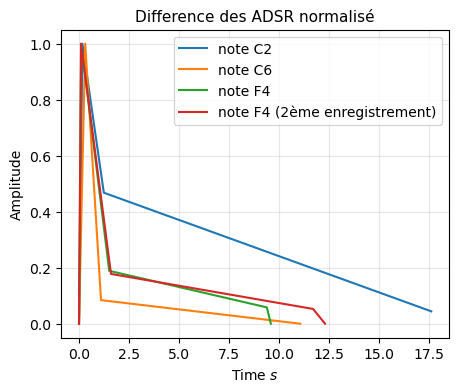

In [17]:
adsr_f4 = np.array([[2.21, 0], [2.32, 0.036], [3.72, 0.0068], [11.6, 0.0021], [11.8, 0]])
adsr_f4_2 = np.array([[21.4, 0], [21.5, 0.036], [23, 0.0064], [33.1, 0.0019], [33.7, 0]])
adsr_c2 = np.array([[3.89, 0], [4.06, 0.0624], [5.13, 0.0292], [21.5, 0.00276], [21.5, 0.00276]])
adsr_c6 = np.array([[4.14, 0], [4.45, 0.019], [5.24, 0.0016], [15.2, 0], [15.2, 0]])

# adsr_c2 = norm_adsr(adsr_c2)
# norm_adsr(adsr_c6)
# norm_adsr(adsr_f4)
# norm_adsr(adsr_f4_2)
arr = [adsr_c2, adsr_c6, adsr_f4, adsr_f4_2]
plot_difference_adsr_pitch(arr)

Resultats: 

Nous observons que l’enveloppe ADSR du piano varie en fonction de la hauteur de la note. Plus la note est aiguë, plus la phase de decay est courte, ce qui fait que l’amplitude reste élevée dans l’état de sustain. Cela crée une descente plus abrupte après l’attaque, avec un niveau de sustain plus haut pour les notes aiguës que pour les notes graves. Dans une vue réelle, cela explique pourquoi les notes basses dans le piano ont un son boueux et peu clair par rapport à ses notes aiguës.

Discussion :

Ces différentes caractéristiques sont dues à plusieurs facteurs :


La différence d’épaisseur des cordes. Cela vaut pour la guitare comme pour le piano, mais dans le cas du piano, cette différence est plus marquée, surtout par rapport à la longueur des cordes, qui diminue également à mesure que la hauteur de la note augmente. À l’inverse, sur une guitare, la longueur des cordes reste constante.

Dans le registre grave, les cordes du piano sont particulièrement épaisses, ce qui modifie le son et lui donne un aspect plus métallique. Pour atténuer cet effet, les marteaux sont recouverts d’un matériau doux permettant d’amortir le son métallique.



Enfin, les instruments ne sont pas conçus uniquement pour l’esthétique. Les ingénieurs prennent en compte les phénomènes acoustiques liés à la génération du son, et conçoivent les instruments de manière à faire ressortir certains harmoniques pour rendre le son plus agréable à l’oreille. Par exemple, la caisse de résonance d’une guitare est pensée pour mettre en valeur certaines modes de résonance, de sorte qu’un harmonique spécifique devienne plus audible lors de l’exécution.

C'est pourquoi pour la comparison des enveloppes guitare et piano, nous restons dans un fréquence similaire

Pour la guitare, cet effet n’est pas observé. Les enveloppes des différentes hauteurs restent relativement similaires, avec peu de variation notable dans la durée du decay ou le niveau de sustain. Cela suggère une enveloppe plus uniforme quel que soit le registre de la note jouée.

### 2.1.2 Étude du spectre de la guitare et piano

Maintenant, nous allons voir le contenu harmonique du son de la guitare et le piano, en utilisant la transformée de Fourier pour voir le contenu fréquentielles d'un signal donné.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Helper function to convert frequency to note name
def freq_to_note(freq):
    A4 = 440.0
    if freq == 0:
        return "N/A"
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    n = int(np.round(12 * np.log2(freq / A4)))
    note_index = (n + 9) % 12  # A is index 9
    octave = 4 + ((n + 9) // 12)
    return f"{note_names[note_index]}{octave}"

def plot_fourier(y, title, sr=44100, min_amplitude=0.1, max_freq_limit=2000, peak_grouping_window=50):
    freqs = np.fft.rfftfreq(len(y), 1 / sr)
    spectre = np.abs(np.fft.rfft(y))
    spectre /= np.max(spectre)  # Normalize

    peaks, properties = find_peaks(spectre, height=min_amplitude, distance=10)
    peak_freqs = freqs[peaks]
    peak_amps = spectre[peaks]

    valid_peaks = (peak_freqs < max_freq_limit) & (peak_amps >= min_amplitude)
    valid_freqs = peak_freqs[valid_peaks]
    valid_amps = peak_amps[valid_peaks]

    if len(valid_freqs) > 0:
        sorted_indices = np.argsort(valid_freqs)
        valid_freqs = valid_freqs[sorted_indices]
        valid_amps = valid_amps[sorted_indices]

        groups = []
        current_group = [0]
        for i in range(1, len(valid_freqs)):
            if valid_freqs[i] - valid_freqs[current_group[-1]] <= peak_grouping_window:
                current_group.append(i)
            else:
                groups.append(current_group)
                current_group = [i]
        groups.append(current_group)

        strongest_peaks = []
        for group in groups:
            strongest_in_group = group[np.argmax(valid_amps[group])]
            strongest_peaks.append(strongest_in_group)

        fundamental_idx = strongest_peaks[0]
        fundamental_freq = valid_freqs[fundamental_idx]
        fundamental_amp = valid_amps[fundamental_idx]
    else:
        fundamental_freq = freqs[np.argmax(spectre)]
        fundamental_amp = spectre[np.argmax(spectre)]

    # --- Plotting ---
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(freqs, spectre, label="Spectre")

    # Mark and label the fundamental
    ax.scatter(fundamental_freq, fundamental_amp, color='red', zorder=5, label="Fondamental")
    ax.annotate(f'Fondamental: {fundamental_freq:.1f} Hz',
                xy=(fundamental_freq, fundamental_amp),
                xytext=(fundamental_freq + 50, fundamental_amp * 0.95),
                arrowprops=dict(facecolor='black', shrink=0.05),
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

    # Annotate the rest of the peaks with note names
    for i in strongest_peaks[1:]:  # skip fundamental
        f = valid_freqs[i]
        a = valid_amps[i]
        note = freq_to_note(f)
        ax.annotate(f'{note} ({f:.0f} Hz)', 
                    xy=(f, a), 
                    xytext=(f + 30, a),
                    fontsize=9,
                    arrowprops=dict(arrowstyle="->", color='gray'))

    ax.set(title=title, xlabel="Fréquence (Hz)", ylabel="Amplitude", xlim=(0, 3000))
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

def plot_multiple_fourier(signals, labels, sr=44100, min_amplitude=0.1, max_freq_limit=2000):
    """
    Plots the Fourier spectra of multiple signals on separate subplots.

    Parameters:
    - signals: list of numpy arrays (audio signals)
    - labels: list of str (titles for each subplot)
    - sr: sample rate
    - min_amplitude: threshold for peak detection
    - max_freq_limit: max frequency to display
    """

    num_signals = len(signals)
    fig, axes = plt.subplots(1, num_signals, figsize=(10, 1 * num_signals), sharex=True)

    if num_signals == 1:
        axes = [axes]  # Ensure it's iterable

    for idx, (y, title) in enumerate(zip(signals, labels)):
        freqs = np.fft.rfftfreq(len(y), 1 / sr)
        spectre = np.abs(np.fft.rfft(y))
        spectre /= np.max(spectre)

        ax = axes[idx]
        ax.plot(freqs, spectre, label="Spectre")
        ax.set(title=title, ylabel="Amplitude", xlim=(0, max_freq_limit))
        ax.grid(True)

        # Detect and annotate fundamental frequency
        peaks, properties = find_peaks(spectre, height=min_amplitude, distance=10)
        if len(peaks) > 0:
            fundamental_freq = freqs[peaks[0]]
            fundamental_amp = spectre[peaks[0]]
            ax.scatter(fundamental_freq, fundamental_amp, color='red', zorder=5, label="Fondamental")
            ax.annotate(f'{fundamental_freq:.1f} Hz',
                        xy=(fundamental_freq, fundamental_amp),
                        xytext=(fundamental_freq + 30, fundamental_amp * 0.9),
                        arrowprops=dict(facecolor='black', shrink=0.05),
                        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.4))

        ax.legend()

    axes[-1].set_xlabel("Fréquence (Hz)")
    plt.tight_layout()
    plt.show()




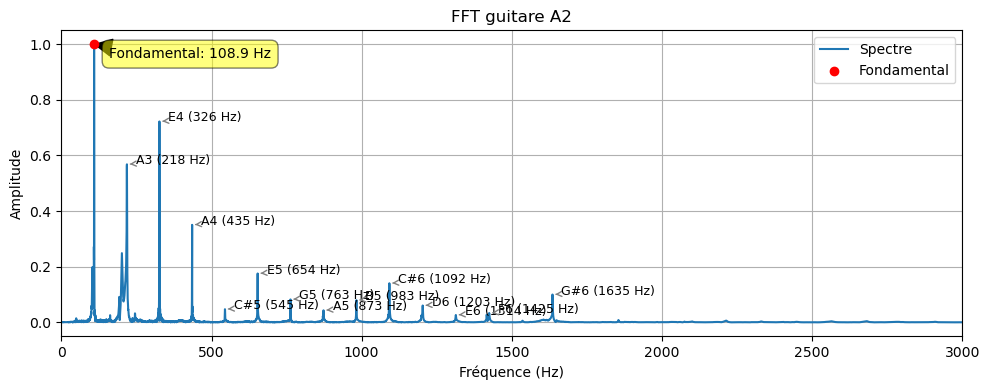

In [46]:
# guitar
plot_fourier(y_guitar, "FFT guitare A2", min_amplitude=0.02, peak_grouping_window=30)

En observant les spectres de Fourier obtenus à partir des enregistrements de piano et de guitare, on distingue plusieurs pics marqués. Ces pics correspondent aux fréquences présentes dans le signal sonore. Le premier pic, situé à la fréquence la plus basse, représente la fréquence fondamentale, c’est-à-dire la hauteur perçue de la note jouée. Les pics suivants correspondent à des partiels (ou partiels), qui sont généralement des multiples entiers de cette fréquence fondamentale : par exemple, 2 fois, 3 fois, 4 fois la fréquence de base, etc.

En règle générale, l’amplitude des partiels décroît progressivement avec la fréquence, ce qui reflète l’enrichissement du timbre sans dominer la note principale. Cependant, pour certaines notes comme le E2 de la guitare, on observe que cette décroissance n’est pas parfaitement régulière. Certains partiels ressortent de manière plus marquée que d’autres, ce qui contribue à la couleur sonore spécifique de cette note sur cet instrument.

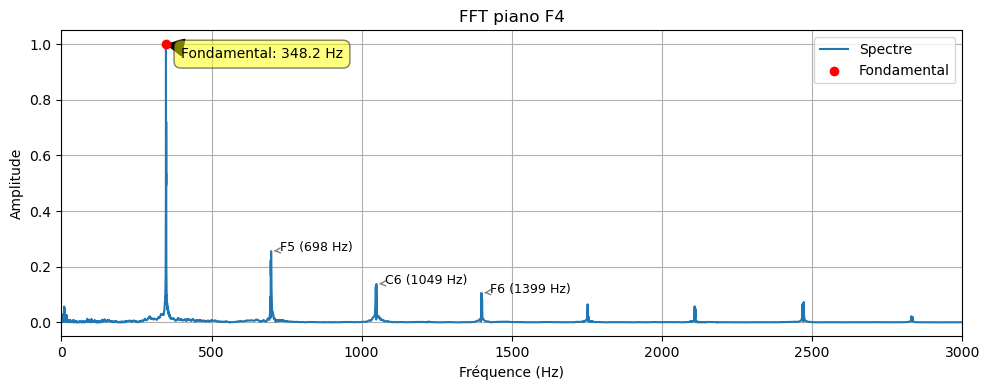

In [47]:
# piano
plot_fourier(y_piano_f4, "FFT piano F4")

le piano, monte contient tout de meme des partiels quoi qu'il soit plus petit en amplitude par rapport à la fondamentale. Donc le contenu du son est dominé par la frequence fondamentale.

LA DIFFERENCE:
- guitar a des partiels de plus haut amplitude qui fait en sort qu'on entend plus une grande partie ces partiels frequence quand on joue qui joue un role sur la 'richesse' du son. Bien qu'on disait qu'un piano est plus riche en sons. C'est parceque la richesse repose sur plusierus facteurs pas seulement le contenu spectrale du son, comme le sustain. Nous avons vu que l'enveloppe varie en fonction de registre sur le piano. Donc en fait le sustain plus grand fait que ces partiels diminue moins vites avec les amplitudes du son reste tres haut comparant a des guitars qui est plus vite.

## PARTIE BONUS: registre de piano

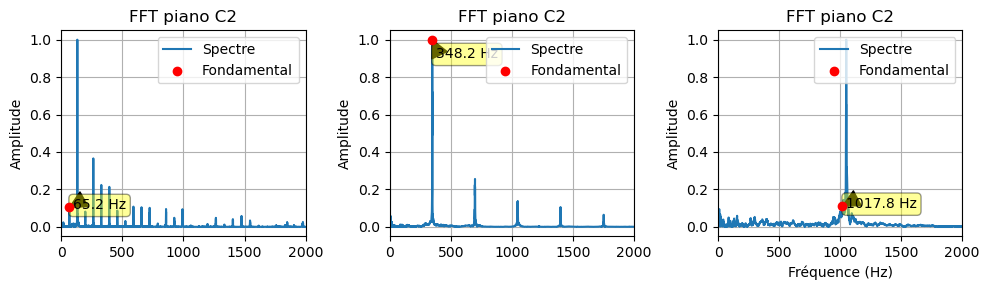

In [58]:
y_piano_c2, x_piano_c2 = prepare_audio("Audio_HD/C2.wav", 1.5, 10.2, sr)
y_piano_c6, x_piano_c6 = prepare_audio("Audio_HD/C6.wav", 1.7, 4, sr)
# librosa.display.waveshow(y_piano_c2, sr=sr)
# librosa.display.waveshow(y_piano_c6, sr=sr)

plot_multiple_fourier([y_piano_c2, y_piano_f4, y_piano_c6], ["FFT piano C2","FFT piano C2","FFT piano C2"])

Résultats: 

en analysant les spectres de Fourier des notes C2, F4 et C6 jouées au piano, on constate des différences notables selon le registre. Pour C2 (note grave), la fréquence fondamentale est visible mais avec une amplitude très faible. En revanche, le premier harmonique (deuxième pic) est nettement plus marqué, dépassant largement tous les autres en intensité. À l’inverse, pour C6 (note aiguë), c’est la fréquence fondamentale qui contient presque toute l’énergie du signal, tandis que les harmoniques sont présents mais avec des amplitudes très faibles. La note F4, située dans le registre médium, montre un équilibre plus classique entre la fondamentale et ses harmoniques.

Discussion: 

Ces différences s’expliquent par plusieurs facteurs physiques et acoustiques :

Dans le registre grave, les cordes sont plus longues, plus épaisses et plus rigides, ce qui limite la propagation des harmoniques de haute fréquence. Cela entraîne une accumulation d’harmoniques proches de la fondamentale, avec des amplitudes souvent comparables ou supérieures à celle-ci.

De plus, les marteaux du piano dans les graves sont plus doux pour éviter un son métallique. Ce compromis donne un son plus chaud, mais moins clair, car l’impact est moins précis. De plus la frequence fondamentale presente à priori l'amplitude le plus grand mais il s'avère qu'il est en contact avec la partie mou du marteau qui va donc reduire l'amplitude fortement en transmettant son energie.

Le table d’harmonie du piano est optimisée pour amplifier les fréquences médiums et aiguës. Ainsi, les notes basses comme C2 sont moins bien projetées, ce qui peut contribuer à un son plus "brouillé" ou "étouffé".

En comparaison, la guitare présente moins de variations dans l’enveloppe ou la richesse spectrale selon la hauteur des notes. La forme du corps de la guitare amplifie aussi davantage les fréquences médium et aiguës, mais les cordes, moins rigides relativement à leur longueur, permettent une répartition plus régulière des harmoniques.

Concernant l’enveloppe sonore, la guitare décroit plus rapidement, avec un sustain plus court que le piano. Cependant, son comportement est plus homogène sur l’ensemble des notes.

Il faut aussi considérer la position d’attaque de la corde sur la guitare : selon que l’on gratte près du chevalet ou plus vers le centre, la répartition des harmoniques varie, ce qui modifie le timbre perçu.


***Notes:***<br>
- Mic placement matters: placing it near the strings like we did, means we will hear the strings resonate more than the piano's soundboard frequency response which usually resonates lwer frequencies better. WE will also hear more non-musical noises like mechanical clicks
- the stiffer the string, presents a larger raideur which means higher frequency which bend the string to a more extreme extent will mean that they will show inharmonicity where the real frequency is actually more sharper than the theoretical frequency
-	Lower register C2 produce much more overtones of closer magnitude even having the frequency played much smaller in am-plitude compared to its 2nd harmonic or 3rd harmonic. While C6 puts almost all its energy in the fundamental, leaving all its harmonics of very weak magnitude.
-	The piano soundboard is designed to effi-ciently project the mid-upper register thus leaving the lower register not quite project-ed well leaving a muddier sound.
-	Bass hammers are soft (in the lower regis-ter) to avoid harshness when struck on the thicker metallic string. A compromise that leads to a warmer tone like its middle and upper register however it reduces the clari-ty of the note (the point of contact becomes bigger)
-	In terms of the envelope characteristics be-tween the guitar and the piano, the guitar decays faster when plucked and has a shorter sustain period because of it. How-ever, along the range of frequencies the guitar rests about the same in terms of waveshape, envelope characteristics and overtone magnitudes, while the piano var-ies greatly. Therefore, our hypothesis for the initial conditions of the 
hammers of a piano striking the strings are somewhat lacking in rigidity and applies cleaner to the guitar while the conditions must be reviewed and might vary depend-ing on the range on the keys.
-	The initial conditions of a guitar in fact must be reviewed as we commonly strike the guitar not in the middle but closer to the fix point of the guitar which affects the harmonics generated, thus we have studied this difference for different plucking posi-tion along one open string of the guitar.


### 2.1.3 Modèle Numérique

ANDREA: when you follow the td of our teacher (michael perez) and when he disccuess the fourier coefficients of the fourier series of a piano, then guitar. After comparing the results with the model, say that the in the end the initial condition posed in the document (le cours) should be improved and perhaps changed. Fore example, with a guitar we commonly strike the guitar not in the middle but closer to the fix point of the guitar which affects the harmonics generated

### Conclusion
le piano est un instrument tres complexes. Les concepteurs a fait expres de garder l'amplitude dans les registres plus bas pour que dans le sens de musique, les notes basse qu'on joue can be sort of support for our musical songs. That last longer and can resonate other notes to give a sense of richness in the notes. Especially if the sustain pedal is used which makes all the strings on the piano tobe able to resonate and add more sounds to the piano unlike the guitar where this effect is less present because the hammer of a piano is able to create much more energy than the plucjing or strumming of a guitar.

au final, les 2 outils ensemble la variation de l'amploitude en temps et le contenu spectral du son permet de nous dire sur certains cjharacteristique par exemple la richesse du son. We proved this by comparing with our theoreticla model that use this 2 qualities which is able to replicate closely the sounds of a guitar and piano using these 2 tools.

- Mic placement matters: placing it near the strings like we did, means we will hear the strings resonate more than the piano's soundboard frequency response which usually resonates lwer frequencies better. WE will also hear more non-musical noises like mechanical clicks

## 2.2 Étude de l'harmonicité d'un accord

Dans cette partie, nous allons nous demander ce qui rend un accord harmonieux. En musique, un accord est un ensemble de notes qui sont jouées en même temps. Nous allons nous concentrer sur le piano. Nous nous sommes aperçus que certaines notes jouées ensemble produisaient un son harmonieux et agréable à écouter, d'autres pas du tout. Existe-t-il un moyen de quantifier cet aspect harmonieux ?

### 2.2.1 Première approche : à partir des notes séparées

Nous allons utiliser le système anglo-saxon pour nommer les notes.  
Voici les correspondances :
| Anglo-saxon | Latin (français) |
|-------------|------------------|
| A           | La               |
| B           | Si               |
| C           | Do               |
| D           | Ré               |
| E           | Mi               |
| F           | Fa               |
| G           | Sol              |

<div class="alert alert-block alert-info">
Expliquer bemol et diese
</div>



Tous d'abord, nous allons étudier les spectres individuels de chaque note qui composent l'accord. Nous avons choisi d'étudier un accord de Do Majeur (Do, Mi, Sol joués ensemble), et le notes Do et Si jouées ensemble.

In [21]:
# --- Paramètres ---
freq_A1 = 27.5
notes = ['C', 'C#', 'D', 'D#', 'E', 'F',
        'F#', 'G', 'G#', 'A', 'A#', 'B']

# --- Fonctions utiles ---
def freq_to_note(freq):
    '''
    Retourne le nom d'une note et son octave à partir d'une fréquence
    '''
    A_index = 9  # Position de A dans la liste des notes
    if freq <= 0:
        return None
    n_demi_tons = round(12 * np.log2(freq / freq_A1))
    note_index = (A_index + n_demi_tons) % 12
    octave = (A_index + n_demi_tons) // 12
    return notes[note_index] + str(octave)


In [22]:
def trouve_pics(audio, sr, seuil_detection_pourcent = 0.05, tolerance_hz=5):
    '''
    Renvoie les pics d'un spectre en fréquence, avec une tolérance en herz minimum pour ne pas détecter des pics
    trop proches et un seuil en amplitude pour ne pas considérer le bruit.

    '''
    amplitude = np.abs(np.fft.rfft(audio))
    freqs = np.fft.rfftfreq(len(audio), 1 / sr)
    
    freq_resolution = freqs[1]-freqs[0]
    min_distance = int(tolerance_hz/freq_resolution)
    
    i_peaks, _ = find_peaks(amplitude, height=np.max(amplitude) * seuil_detection_pourcent, distance=min_distance)
    freq_peaks = sorted(freqs[i_peaks])
    
    return i_peaks, freq_peaks


In [23]:
def afficher_spectre_notes(fichiers, title):
    dico = {}
    tolerance_hz = 10
    fondamentales = []

    for f in fichiers:
        dico[f] = []
        audio, sr = librosa.load(f, sr=44100)

        freqs = np.fft.rfftfreq(len(audio), 1 / sr)
        spectre = np.abs(np.fft.rfft(audio))
        spectre /= np.max(spectre)
        

        freq_resolution = freqs[1] - freqs[0]
        min_distance = int(tolerance_hz / freq_resolution)

        # Sécurise la détection de fondamentale
        i_fondamentale = find_peaks(spectre, height=0.2, distance=min_distance)[0][0]
        fondamentale = freqs[i_fondamentale]
        fondamentales.append(fondamentale)

        # Recherche des harmoniques après la fondamentale
        offset = i_fondamentale * 2 - 5
        i_harmoniques, _ = find_peaks(spectre[offset:], height=0.02, distance=min_distance)
        freq_harmoniques = freqs[offset:][i_harmoniques]

        print(f"Fondamentale pour {f} : {round(fondamentale,1)} Hz")
        print(f"Harmoniques détectées : {[round(float(f),1) for f in freq_harmoniques]}")

        dico[f].append(freqs)               # 0
        dico[f].append(spectre)             # 1
        dico[f].append(fondamentale)        # 2
        dico[f].append(freq_harmoniques)    # 3

    # Calcul des rapports de fondamentales
    rapports = []
    for i in range(len(fondamentales) - 1):
        fraction = Fraction(fondamentales[i + 1] / fondamentales[0]).limit_denominator(7)
        rapports.append(f"{fraction.numerator}/{fraction.denominator}")

    # Recherche de pics harmoniques communs
    pics_en_commun = []
    for nom1, nom2 in itertools.combinations(fichiers, 2):
        for f1 in dico[nom1][3]:
            note_f1 = freq_to_note(f1)
            for f2 in dico[nom2][3]:
                note_f2 = freq_to_note(f2)
                if note_f1 == note_f2 and f1 not in pics_en_commun:
                    pics_en_commun.append(f1)

    pics_en_commun = sorted([round(float(pic),1) for pic in pics_en_commun])
    print(f"Les spectres présentent {len(pics_en_commun)} fréquences communes : {pics_en_commun}")
    print("Notes correspondantes :", [freq_to_note(pic) for pic in pics_en_commun])
    print("Rapports de fréquences entre fondamentales :", rapports)

    # --- Affichage ---
    fig, ax = plt.subplots(figsize=(10, 4))
    colors = ['#1f77b4','#ff7f0e','#2ca02c']
    for i, (key, (freqs, spectre, _, _)) in enumerate(dico.items()):
        ax.plot(freqs, spectre, color=colors[i], alpha=1, linestyle='-', label=key)

    for pic in pics_en_commun:
        plt.annotate(freq_to_note(pic), xy=(pic, 0.3),
                     xytext=(pic, 0.8),
                     arrowprops=dict(facecolor='black', shrink=0.01),
                     ha='center')

    ax.set(title=title, xlabel="Fréquence (Hz)", ylabel="Amplitude", xlim=(0, 3000))
    ax.grid(True)
    ax.legend()
    plt.show()




In [24]:
def afficher_spectre_accord(fichier, title, nb_notes = 3):
  
    audio, sr = librosa.load(fichier)
    audio = audio[2*sr:5*sr]   # trim

    # --- Transformée de Fourier ---
    freqs = np.fft.rfftfreq(len(audio), 1 / sr)
    spectre = np.abs(np.fft.rfft(audio))
    spectre /= max(spectre)



    # --- Détection fondamentales ---
    freq_peaks = trouve_pics(audio, sr,seuil_detection_pourcent=0.1,tolerance_hz=3)[1]
    dico_accords = {}
    noms_note = []
    nb_harmoniques = 6


    for i in range(nb_notes):
        fondamentale = freq_peaks[i]
        nom_note = freq_to_note(fondamentale)
        noms_note.append(nom_note)
        dico_accords[nom_note] = [fondamentale]
        for j in range(nb_harmoniques):
            dico_accords[nom_note].append(fondamentale*(j+2))

    pics_en_commun = []

    # Parcourir toutes les combinaisons de fréquences
    for f1 in dico_accords[noms_note[0]]:
        note_f1 = freq_to_note(f1)
        count = 0
        for key, peaks in dico_accords.items():  # Pour chaque fichier dans le dictionnaire
            if key != noms_note[0]:  # Ignorer le 1er fichier car on l'a déjà parcouru
                for f2 in peaks:
                    note_f2 = freq_to_note(f2)
                    if note_f1 == note_f2 :
                        count += 1
                        break 
                if count >= 1:  # Si trouvé dans au moins un autre fichier
                    break  # On peut sortir de la boucle des fichiers

        if count >= 1:  # Présence dans au moins 2 listes
            pics_en_commun.append(round(float(f1),1))



    print("Les spectres de chaque note présentent", len(pics_en_commun), "fréquence(s) commune(s) :", pics_en_commun)



    # --- Affichage ---
    colors = ['#1f77b4','#ff7f0e','#2ca02c']
    fig, ax = plt.subplots()

    # --- Spectre ---
    ax.plot(freqs, spectre,label=fichier, color='black')

    # --- Harmoniques ---
    for i, (nom, accord) in enumerate(dico_accords.items()):
        color = colors[i]
        ax.axvline(x=accord[0], color=color, linestyle='--', linewidth = 1, alpha=1,label=nom)
        for freq in accord[1:] : 
            ax.axvline(x=freq, color=color, linestyle='--', linewidth = 1, alpha=1)

    # --- Pics en commun ---        
    for pic in pics_en_commun : 
        note = freq_to_note(pic)
        
        ax.annotate(freq_to_note(pic), xy=(pic, 0.4),
                    xytext=(pic, 0.6),
                    arrowprops=dict(facecolor='black', shrink=0.01),
                    ha='center')

    ax.set(title = title, xlabel= "Fréquence (en Hz)", ylabel="Amplitude", xlim=(0, 3000))
    ax.legend()
    plt.show()


In [25]:
def difference_notes_accord(fichiers_notes, fichier_accord):
    
    
    somme_spectres = None
    for f in fichiers_notes :
        audio, sr = librosa.load(f, sr = 44100, duration=1)
        freqs = np.fft.rfftfreq(len(audio), 1 / sr)
        spectre = np.abs(np.fft.rfft(audio))
        
        if somme_spectres is None :
            somme_spectres = spectre
        else :
            somme_spectres += spectre
        
    somme_spectres /= max(somme_spectres)
   
    accord, sr = librosa.load(fichier_accord)
    accord = accord[sr:5*sr]   # trim

    # --- Transformée de Fourier ---
    freqs_accord = np.fft.rfftfreq(len(accord), 1 / sr)
    spectre_accord = np.abs(np.fft.rfft(accord))
    spectre_accord /= max(spectre_accord)
    
    
    

    # --- Affichage ---
    colors = ['#1f77b4','#ff7f0e','#2ca02c']
    fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
    
    ax1.plot(freqs_accord, spectre_accord, color = colors[0], linestyle='-', label = "Spectre de l'accord")
    ax2.plot(freqs, somme_spectres, color = colors[1], linestyle='-', label = 'Somme des spectres de chaque note')
    
    
    ax1.set(title = "Différence entre la somme des spectres des notes et et le spectre de l'accord", ylabel="Amplitude", xlim=(0, 3000))
    ax1.grid(True)
    ax1.legend()

    ax2.set(xlabel= "Fréquence (en Hz)", ylabel="Amplitude", xlim=(0, 3000))
    ax2.grid(True)
    ax2.legend()
    plt.show()


Fondamentale pour Audio_Hugo/C4.wav : 261.4 Hz
Harmoniques détectées : [524.0, 786.0, 1048.5, 1312.9, 1578.5]
Fondamentale pour Audio_Hugo/E4.wav : 329.9 Hz
Harmoniques détectées : [659.9, 991.3, 1323.4, 1657.7, 1994.9, 2333.6]
Fondamentale pour Audio_Hugo/G4.wav : 391.4 Hz
Harmoniques détectées : [784.4, 1178.2]
Les spectres présentent 2 fréquences communes : [786.0, 1312.9]
Notes correspondantes : ['G5', 'E6']
Rapports de fréquences entre fondamentales : ['5/4', '3/2']


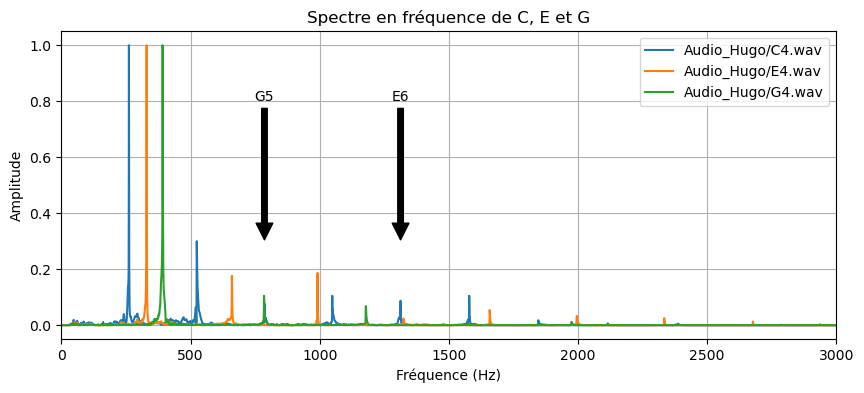

In [26]:
afficher_spectre_notes(["Audio_Hugo/C4.wav","Audio_Hugo/E4.wav","Audio_Hugo/G4.wav"], title="Spectre en fréquence de C, E et G")

Fondamentale pour Audio_Hugo/B3.wav : 247.1 Hz
Harmoniques détectées : [493.8, 504.6, 741.4, 990.0, 1239.1, 1489.7, 1742.2]
Fondamentale pour Audio_Hugo/C4.wav : 261.4 Hz
Harmoniques détectées : [524.0, 786.0, 1048.5, 1312.9, 1578.5]
Les spectres présentent 0 fréquences communes : []
Notes correspondantes : []
Rapports de fréquences entre fondamentales : ['1/1']


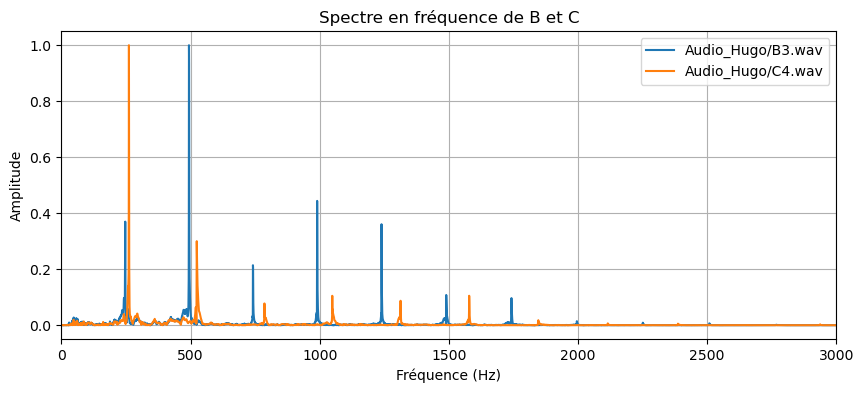

In [27]:
afficher_spectre_notes(["Audio_Hugo/B3.wav","Audio_Hugo/C4.wav"], title="Spectre en fréquence de B et C")


Le premier spectre correspond un Do Majeur, c'est à dire un ensemble de notes agréable à écouter. Sur ce premier spectre, on constate que certaines harmoniques (fréquences multiples de la fondamentale) se superposent. C'est le cas des fréquences 787.5 Hz (G5) et 1316 Hz (E6).

Le deuxième spectre correspond aux notes B et C, c'est à dire 2 notes qui nous semblaient dissonantes. Sur ce spectre, on constate qu'aucune harmonique n'est commune aux 2 notes.

### 2.2.2 À partir d'un accord unique

Nous nous sommes ensuite aperçus qu'en additionant les spectres de chaque note composant un accord, on obtenait le spectre de cet accord.

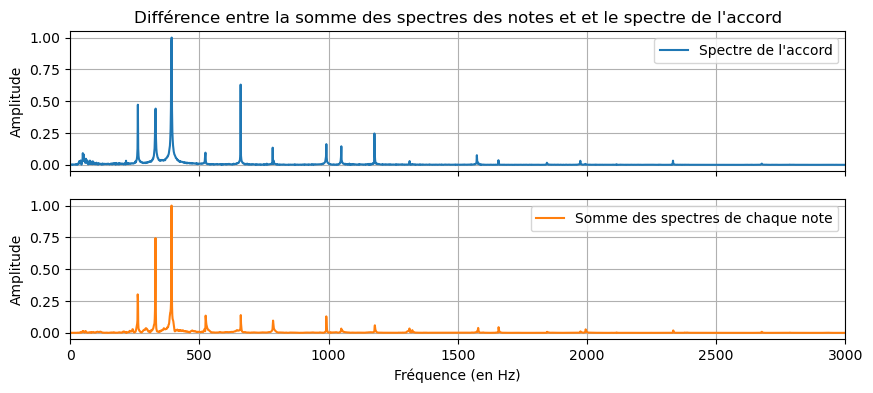

In [28]:
difference_notes_accord(["Audio_Hugo/C4.wav","Audio_Hugo/E4.wav","Audio_Hugo/G4.wav"], "Audio_Hugo/Domaj.wav")

Nous avons cherché à déterminer l'aspect harmonieux d'un accord seulement à partir du spectre de l'accord. Il est difficile d'obtenir les spectres individuels à partir du spectre global. Nous avons donc décidé de nous baser uniquement sur les fréquences des 3 premiers pics (fondamentale de chaque note). A partir de ces fréquences, on en a déduit les fréquences des harmoniques : il nous a suffit de la multiplier par 2, par 3... (lignes en pointillés sur le graphique). De la même façon que dans la partie précédente, nous avons cherché quelles harmoniques se superposaient.

Les spectres de chaque note présentent 1 fréquence(s) commune(s) : [1824.7]


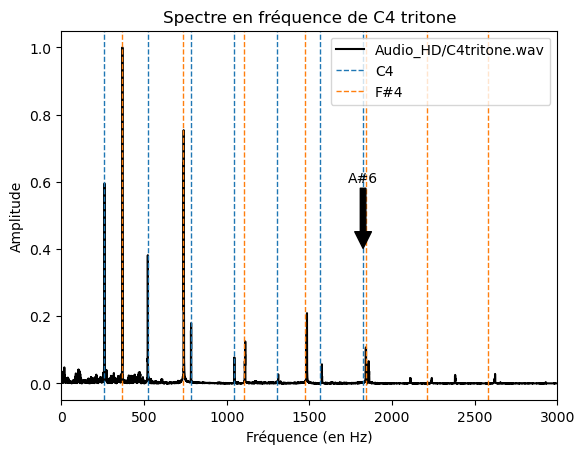

Les spectres de chaque note présentent 0 fréquence(s) commune(s) : []


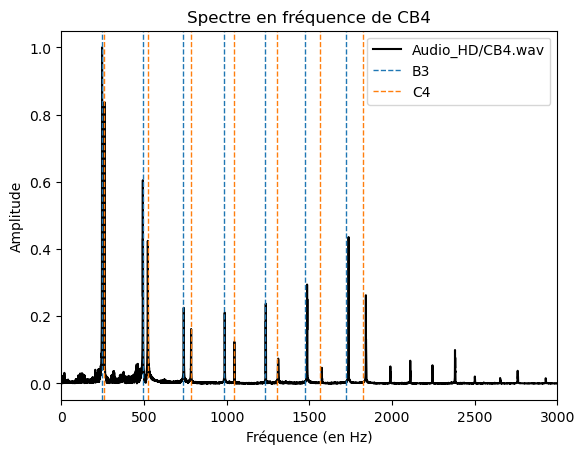

Les spectres de chaque note présentent 3 fréquence(s) commune(s) : [782.0, 1303.3, 1564.0]


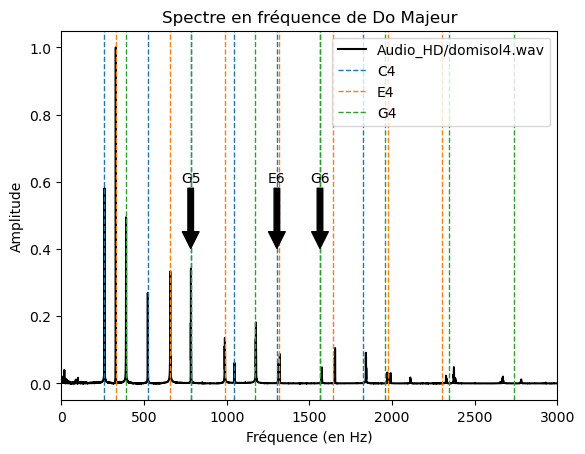

In [29]:
afficher_spectre_accord("Audio_HD/C4tritone.wav",title = "Spectre en fréquence de C4 tritone",nb_notes=2)
afficher_spectre_accord("Audio_HD/CB4.wav",title = "Spectre en fréquence de CB4",nb_notes=2)
afficher_spectre_accord("Audio_HD/domisol4.wav",title = "Spectre en fréquence de Do Majeur",nb_notes=3)